## Import Necessary Module

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

## Fetch Data stored in repository

In [2]:
urls=[
    "https://raw.githubusercontent.com/xuyuon/health_data/main/week_0.csv",
    "https://raw.githubusercontent.com/xuyuon/health_data/main/week_8.csv",
    "https://raw.githubusercontent.com/xuyuon/health_data/main/week_16.csv",
    "https://raw.githubusercontent.com/xuyuon/health_data/main/week_24.csv"
]

df = {
    'week0': pd.read_csv(urls[0], sep=','),
    'week8': pd.read_csv(urls[1], sep=','),
    'week16': pd.read_csv(urls[2], sep=','),
    'week24': pd.read_csv(urls[3], sep=','),
    }
for key in df:
    df[key]['week'] = key

## Reading .csv File into the Programme
If you want to do a data analysis for data on week 0, set `df` to be `df_week0`.

If you want to do a data analysis for data on week 8, set `df` to be `df_week8`.

If you want to do a data analysis for data on week 16, set `df` to be `df_week16`.

If you want to do a data analysis for data on week 24, set `df` to be `df_week24`.

In [3]:
# separating the table into two subtable for control group and experimenting group
group_bs = {}
group_bt = {}
for week, table in df.items():
  group_bs[week] = table[table['group'] == "Group BS"]
  group_bt[week] = table[table['group'] == "Group BT"]

## Data Analysis

In [12]:
# calculating the mean value of each group
items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  print("Mean value for", item)
  print("control group:")
  for week, table in group_bt.items():
    control_mean = np.mean(np.array(table[item]))
    print(week, ":", '{:.4f}'.format(control_mean), ", ", end='')
  print(" ")
  print("with treatment group:")
  for week, table in group_bs.items():
    treatment_mean = np.mean(np.array(table[item]))
    print(week, ":", '{:.4f}'.format(treatment_mean), ", ", end='')
  print(" ")
  print("========================================")


Mean value for pain
control group:
week0 : 4.7040 , week8 : 4.6583 , week16 : 4.6348 , week24 : 4.7130 ,  
with treatment group:
week0 : 4.7600 , week8 : 4.7200 , week16 : 4.8000 , week24 : 4.7920 ,  
Mean value for function
control group:
week0 : 4.9120 , week8 : 4.8917 , week16 : 4.8783 , week24 : 4.8609 ,  
with treatment group:
week0 : 4.8800 , week8 : 4.9120 , week16 : 4.9120 , week24 : 4.9280 ,  
Mean value for self-image
control group:
week0 : 3.6480 , week8 : 3.7500 , week16 : 3.6870 , week24 : 3.6348 ,  
with treatment group:
week0 : 3.8800 , week8 : 3.8560 , week16 : 3.7280 , week24 : 3.8160 ,  
Mean value for mental-health
control group:
week0 : 3.9200 , week8 : 3.9500 , week16 : 3.8435 , week24 : 3.8696 ,  
with treatment group:
week0 : 4.2720 , week8 : 4.4320 , week16 : 4.4240 , week24 : 4.4000 ,  
Mean value for management
control group:
week0 : 3.6200 , week8 : 3.8333 , week16 : 3.8696 , week24 : 3.6739 ,  
with treatment group:
week0 : 3.5600 , week8 : 4.1000 , week16 :

In [13]:
# calculating the standard deviation of each group
items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  print("Mean value for", item)
  print("control group:")
  for week, table in group_bt.items():
    control_sd = np.std(np.array(table[item]))
    print(week, ":", '{:.4f}'.format(control_sd), ", ", end='')
  print(" ")
  print("with treatment group:")
  for week, table in group_bs.items():
    treatment_sd = np.std(np.array(table[item]))
    print(week, ":", '{:.4f}'.format(treatment_sd), ", ", end='')
  print(" ")
  print("========================================")

Mean value for pain
control group:
week0 : 0.3206 , week8 : 0.2914 , week16 : 0.3370 , week24 : 0.3274 ,  
with treatment group:
week0 : 0.3046 , week8 : 0.2884 , week16 : 0.2466 , week24 : 0.2497 ,  
Mean value for function
control group:
week0 : 0.1883 , week8 : 0.1730 , week16 : 0.2264 , week24 : 0.2915 ,  
with treatment group:
week0 : 0.1789 , week8 : 0.1395 , week16 : 0.1883 , week24 : 0.1484 ,  
Mean value for self-image
control group:
week0 : 0.6074 , week8 : 0.6035 , week16 : 0.6402 , week24 : 0.5130 ,  
with treatment group:
week0 : 0.5571 , week8 : 0.6158 , week16 : 0.6037 , week24 : 0.6323 ,  
Mean value for mental-health
control group:
week0 : 0.7419 , week8 : 0.5331 , week16 : 0.5955 , week24 : 0.5583 ,  
with treatment group:
week0 : 0.5625 , week8 : 0.4443 , week16 : 0.4710 , week24 : 0.5307 ,  
Mean value for management
control group:
week0 : 0.5344 , week8 : 0.5336 , week16 : 0.6118 , week24 : 0.6854 ,  
with treatment group:
week0 : 0.6974 , week8 : 0.6325 , week16 :

## T-test

Now, we conduct a T-test to compare the two groups of data (control and experimental). **T-tests** are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution. From the T-test, we are able to deduce the t-statistic and p-value.

Note that T-test is a two-tailed test.

The definition of t-statistic and p-value follows from:
- **t-statistic**: t-statistic is the ratio of the difference in a number's estimated value from its assumed value to its standard error.
- **p-value**: the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

In [14]:
items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  print("t-statistic for", item, ": ")
  for week, table in group_bt.items():
    ttest = ttest_ind(np.array(table[item]), np.array(group_bs[week][item]))
    print(week, ":", '{:.4f}'.format(ttest[0]), ", ", end='')
  print(" ")
  print("p-value for", item, ": ")
  for week, table in group_bt.items():
    ttest = ttest_ind(np.array(table[item]), np.array(group_bs[week][item]))
    print(week, ":", '{:.4f}'.format(ttest[1]), ", ", end='')
  print(" ")
  print("========================================")

t-statistic for pain : 
week0 : -0.6203 , week8 : -0.7290 , week16 : -1.9079 , week24 : -0.9239 ,  
p-value for pain : 
week0 : 0.5380 , week8 : 0.4696 , week16 : 0.0627 , week24 : 0.3604 ,  
t-statistic for function : 
week0 : 0.6036 , week8 : -0.4444 , week16 : -0.5511 , week24 : -0.9956 ,  
p-value for function : 
week0 : 0.5490 , week8 : 0.6588 , week16 : 0.5842 , week24 : 0.3246 ,  
t-statistic for self-image : 
week0 : -1.3790 , week8 : -0.5957 , week16 : -0.2238 , week24 : -1.0620 ,  
p-value for self-image : 
week0 : 0.1743 , week8 : 0.5542 , week16 : 0.8239 , week24 : 0.2938 ,  
t-statistic for mental-health : 
week0 : -1.8522 , week8 : -3.3727 , week16 : -3.6814 , week24 : -3.3033 ,  
p-value for mental-health : 
week0 : 0.0702 , week8 : 0.0015 , week16 : 0.0006 , week24 : 0.0019 ,  
t-statistic for management : 
week0 : 0.3345 , week8 : -1.5592 , week16 : -1.9633 , week24 : -2.1309 ,  
p-value for management : 
week0 : 0.7394 , week8 : 0.1257 , week16 : 0.0557 , week24 : 0.0

## Plot

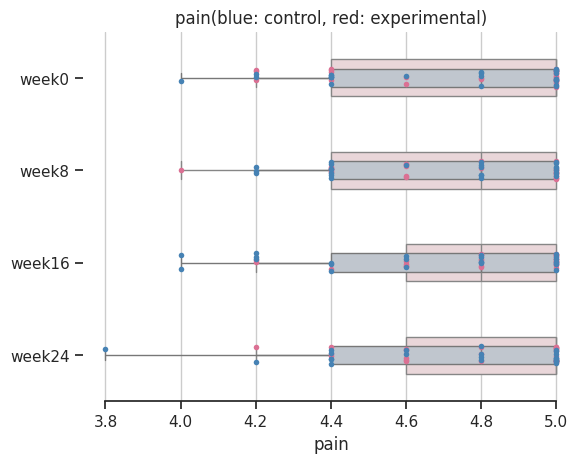

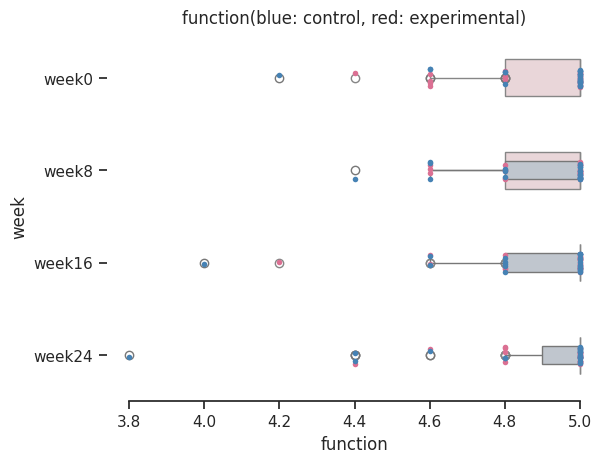

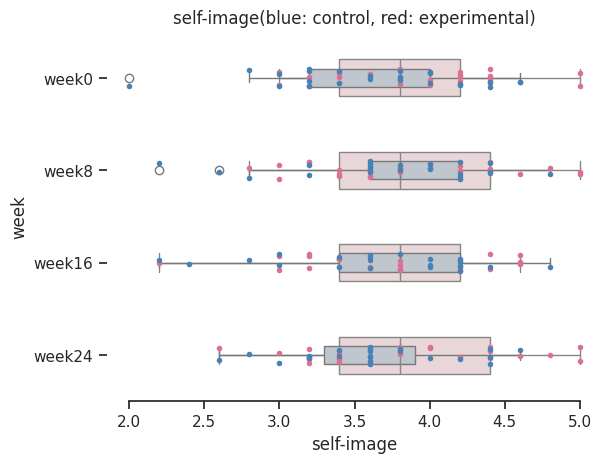

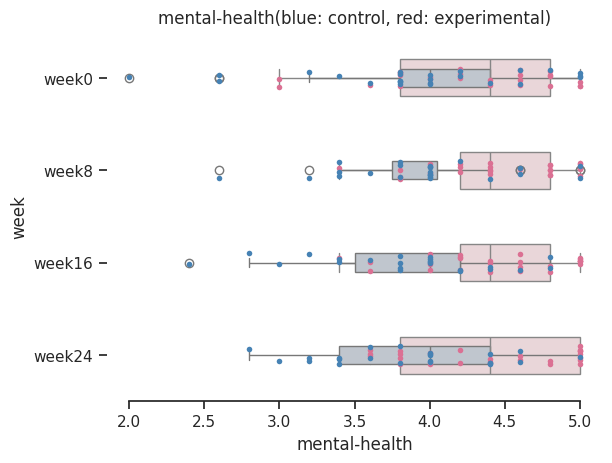

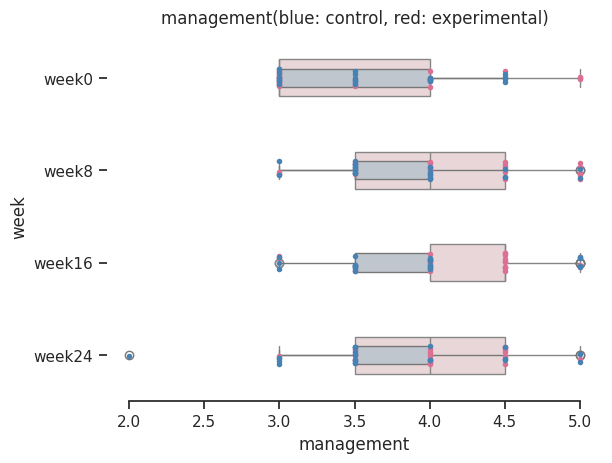

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


f, ax = plt.subplots()

df_all = pd.concat(df.values())
df_bs = df_all[df_all['group'] == 'Group BS']
df_bt = df_all[df_all['group'] == 'Group BT'] #control

items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  # Plot the orbital period with horizontal boxes
  sns.boxplot(
      df_bs, x=item, y="week", color="pink", width=0.4, saturation=0.3
  )

  sns.boxplot(
      df_bt, x=item, y="week", color="lightsteelblue", width=0.2, saturation=0.3
  )

  # Add in points to show each observation
  sns.stripplot(df_bs, x=item, y="week", size=4, color="palevioletred")

  sns.stripplot(df_bt, x=item, y="week", size=4, color="steelblue")

  # Tweak the visual presentation
  ax.xaxis.grid(True)
  ax.set(ylabel="")
  sns.despine(trim=True, left=True)
  plt.title(item+"(blue: control, red: experimental)")
  plt.show()
  plt.close()
  print(" ")


In [15]:
week = "week0"

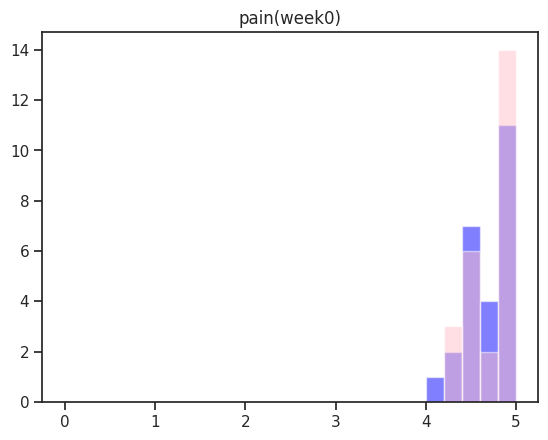

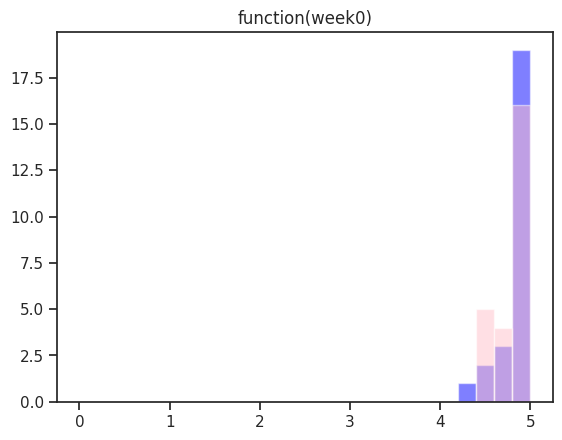

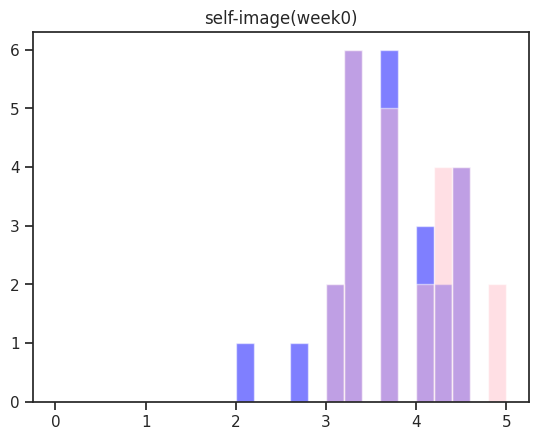

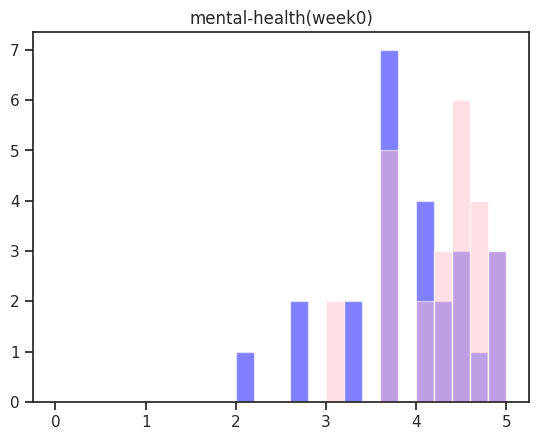

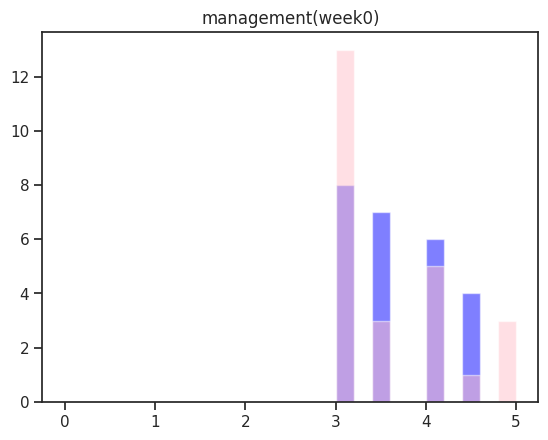

In [16]:
import matplotlib.pyplot as plt
items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  bins = np.linspace(0, 5, 26)
  if item == 'management ':
    bins = np.linspace(0, 5, 11)
  plt.hist(np.array(group_bt[week][item]), bins, color="blue", alpha=0.5)
  plt.hist(np.array(group_bs[week][item]), bins, color="pink", alpha=0.5)
  plt.title(item+"("+week+")")
  plt.show()
  plt.close()

## JS-Divergence
It is important that the two distribution from control data set and experiment data set matches with each other in the beginning of the experiment. A strong difference in the two distribution introduces strong bias.

A good way to measure the statistical distance between two distribution is by **relative entropy** (or KL-divergence). Relative entropy is a non-negative number, with it being 0 implying that there is no difference between two distribution. The larger the value, the greater the difference between the two distribution.



In [ ]:
from scipy.special import rel_entr
items = ['pain', 'function', 'self-image', 'mental health', 'management']
for item in items:
  KL_divergence = rel_entr(np.array(group_bs[item]), np.array(group_bt[item]))
  print("KL-divergence", item, ": ", KL_divergence)
  print("========================================")

In [ ]:
items = ['pain', 'function', 'self-image', 'mental-health', 'management']
for item in items:
  print("t-statistic for", item, ": ")
  for week, table in group_bt.items():
    ttest = ttest_ind(np.array(table[item]), np.array(group_bs[week][item]))
    print(week, ":", ttest[0], ", ", end='')
  print(" ")
  print("p-value for", item, ": ")
  for week, table in group_bt.items():
    ttest = ttest_ind(np.array(table[item]), np.array(group_bt[week][item]))
    print(week, ":", ttest[1], ", ", end='')
  print(" ")
  print("========================================")

t-statistic for pain : 


NameError: name 'group_bt' is not defined